In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Air Quality

In [2]:
base = "database/AQ/"
aq_types = ["CO", "NOx", "Ozone", "PM2.5"]

for aq in aq_types: 
    print("---- Analyzing "+aq+" ----")
    df = pd.read_csv(base+aq+".csv")
    df2 = df[df["Value"] < 0]
    df3 = df2.groupby("County").Value.count()
    print("number of counties:", df3.shape[0])
    print("total negative values across all counties:", df2.Value.count())
    display(df3)

---- Analyzing CO ----
number of counties: 4
total negative values across all counties: 45


County
El Paso       1
Harris        1
Jefferson    39
McLennan      4
Name: Value, dtype: int64

---- Analyzing NOx ----
number of counties: 19
total negative values across all counties: 2020


County
Bexar          64
Brazoria      277
Dallas         62
Denton         10
El Paso        59
Ellis         215
Galveston      97
Harris        120
Harrison       45
Hunt            1
Jefferson     190
Karnes        182
Kaufman        16
Montgomery     81
Navarro       164
Orange         54
Smith         217
Tarrant        86
Wilson         80
Name: Value, dtype: int64

---- Analyzing Ozone ----
number of counties: 2
total negative values across all counties: 2


County
Cameron    1
El Paso    1
Name: Value, dtype: int64

---- Analyzing PM2.5 ----
number of counties: 5
total negative values across all counties: 29


County
Bexar        2
Dallas       4
El Paso     19
Harris       2
Maverick     2
Name: Value, dtype: int64

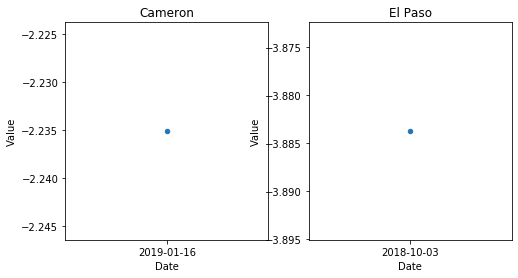

In [3]:
oz = pd.read_csv(base+"ozone.csv")
oz = oz[oz["Value"] < 0]
oz.head()

fig, axes = plt.subplots(1,2, figsize=(8, 4))
for (year, group), ax in zip(oz.groupby(oz.County), axes.flatten()):
    group.plot(x='Date', y='Value', kind='scatter', ax=ax, title=year)

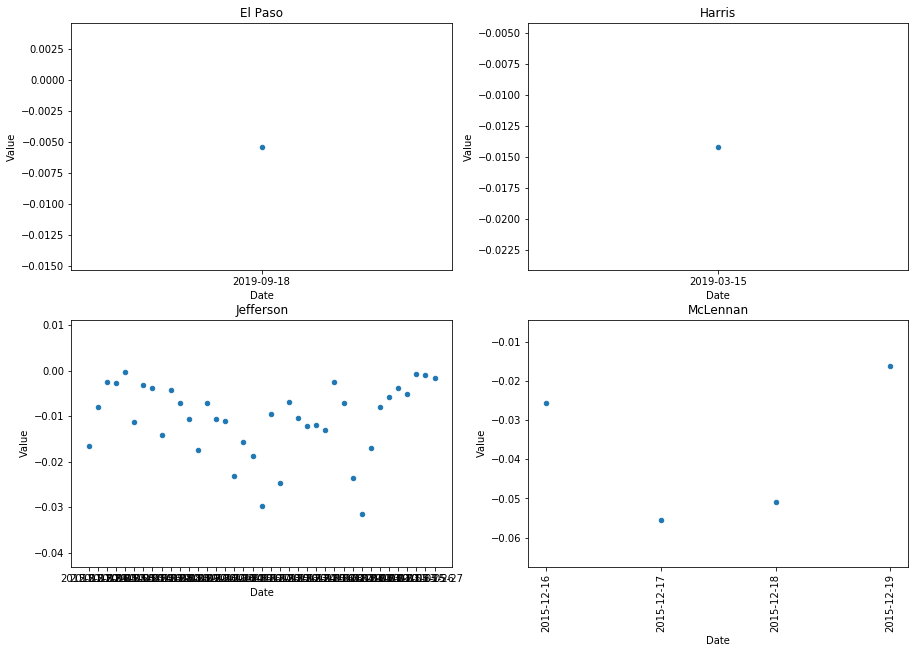

In [4]:
co = pd.read_csv(base+"CO.csv")
co = co[co["Value"] < 0]

fig, axes = plt.subplots(2,2, figsize=(15,10))
for (year, group), ax in zip(co.groupby(co.County), axes.flatten()):
    group.plot(x='Date', y='Value', kind='scatter', ax=ax, title=year)
    plt.xticks(rotation=90);

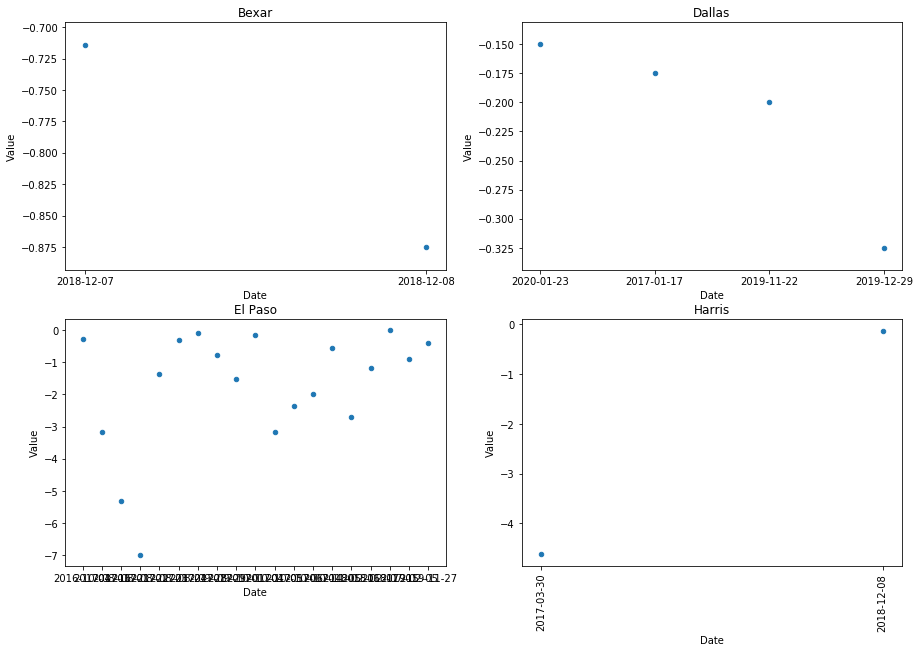

In [5]:
pm25 = pd.read_csv(base+"PM2.5.csv")
pm25 = pm25[pm25["Value"] < 0]


fig, axes = plt.subplots(2,2, figsize=(15,10))
for (year, group), ax in zip(pm25.groupby(pm25.County), axes.flatten()):
    group.plot(x='Date', y='Value', kind='scatter', ax=ax, title=year)
    plt.xticks(rotation=90);

In [6]:
t = df2.groupby("County")
t.head()

,Unnamed: 0,Date,Value,FIPS,Site ID,County
917,1116,2020-01-23,-0.150000,48113,69,Dallas
32095,26972,2016-10-04,-0.266667,48141,44,El Paso
35001,30527,2017-01-17,-0.175000,48113,69,Dallas
37145,33091,2017-03-30,-4.622222,48201,1039,Harris
41318,37961,2017-08-16,-3.176923,48141,44,El Paso
41470,38143,2017-08-21,-5.300000,48141,44,El Paso
41501,38180,2017-08-22,-6.975000,48141,44,El Paso
41532,38217,2017-08-23,-1.377778,48141,44,El Paso
57552,56210,2018-12-07,-0.714286,48029,59,Bexar
57579,56238,2018-12-08,-0.333333,48323,4,Maverick


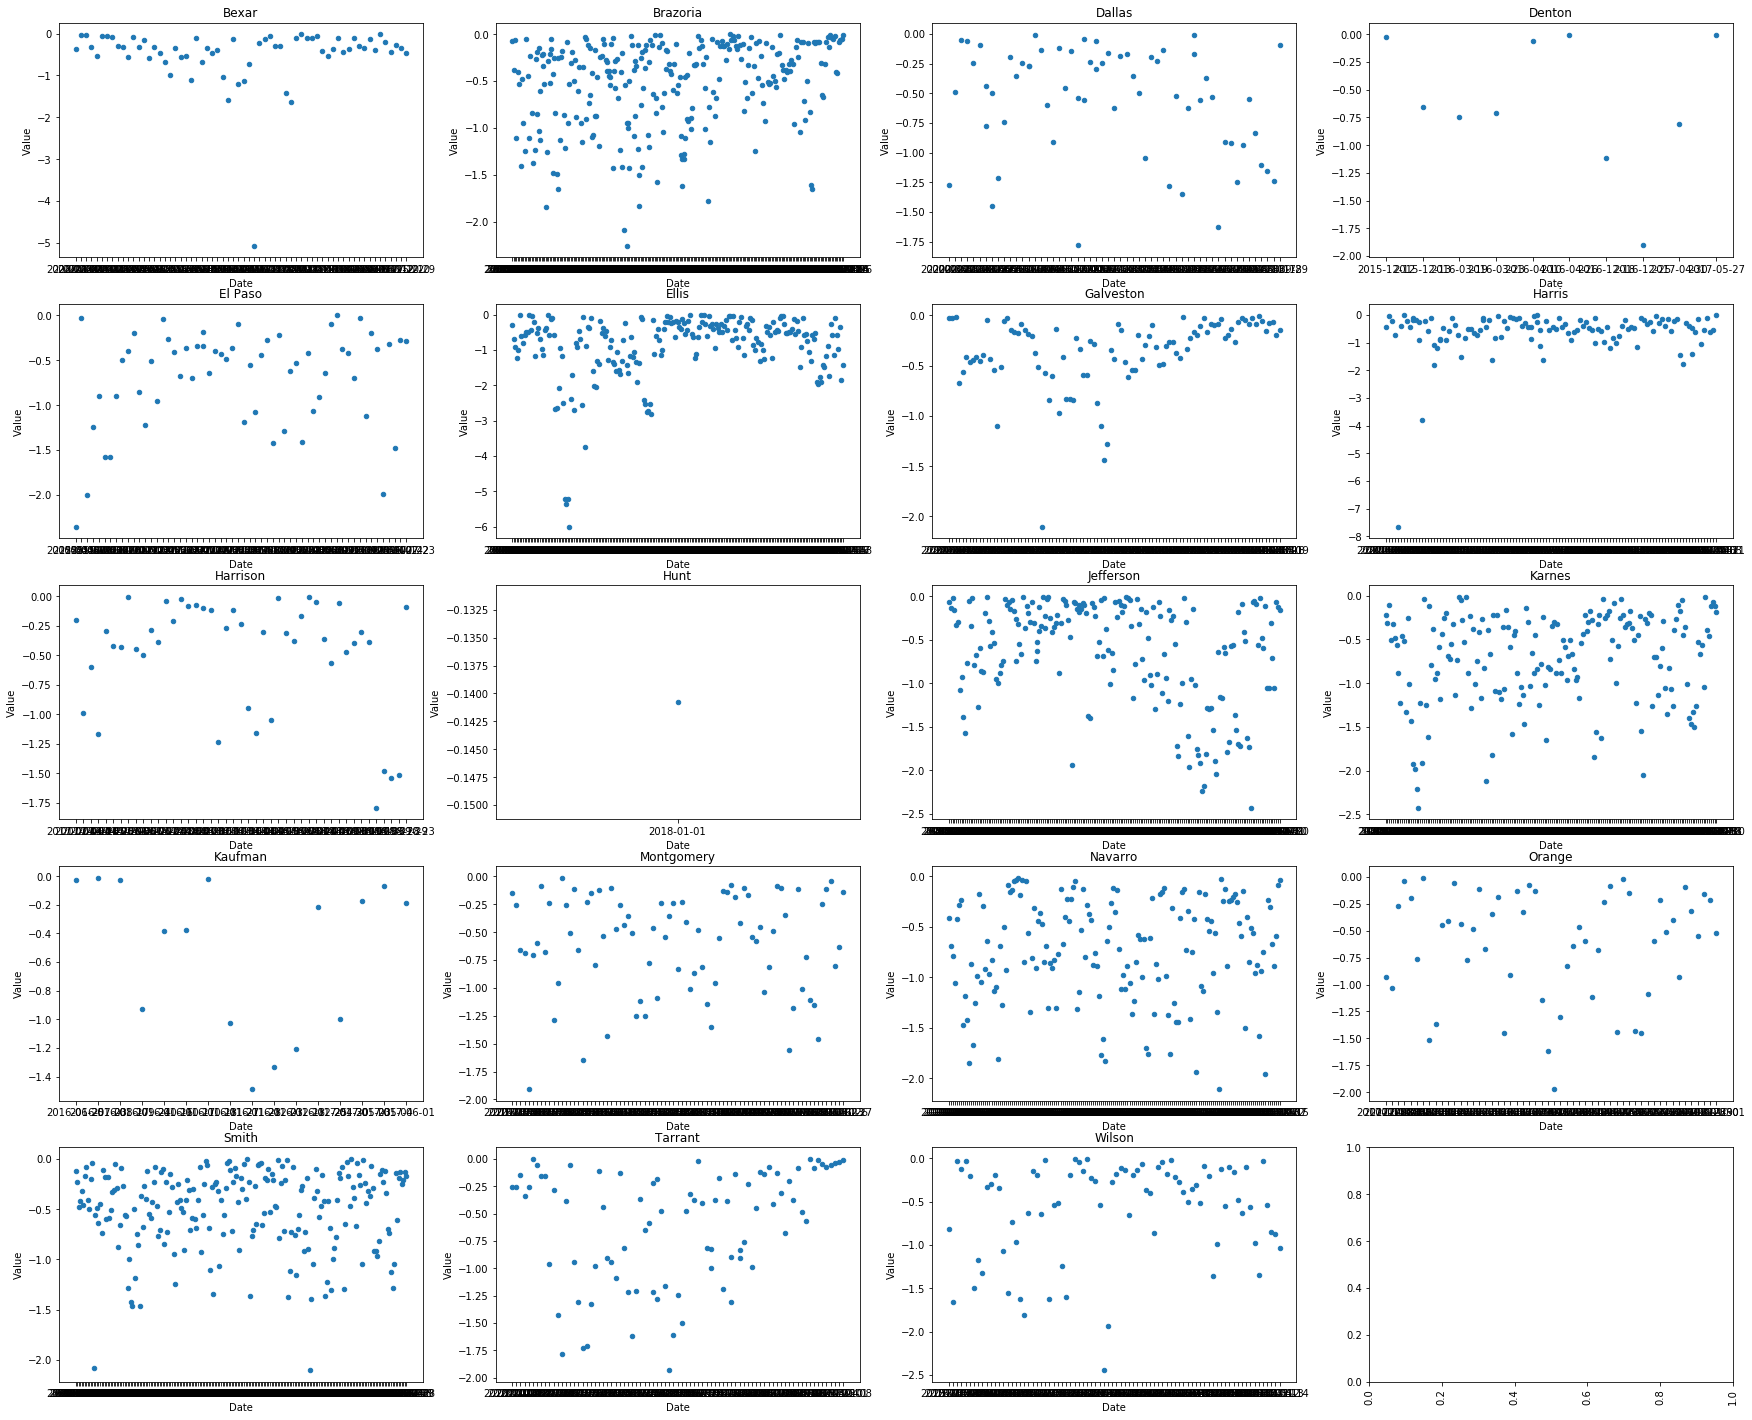

In [29]:
fig, axes = plt.subplots(5,4, figsize=(30,25))
for (year, group), ax in zip(df2.groupby(df2.County), axes.flatten()):
    group.plot(x='Date', y='Value', kind='scatter', ax=ax, title=year)
    plt.xticks(rotation=90);


## Filling values with 0

Mitchell Osborn 

In [18]:
base = "database/AQ/"

oz = pd.read_csv(base+"ozone.csv")
co = pd.read_csv(base+"CO.csv")
pm25 = pd.read_csv(base+"PM2.5.csv")
nox = pd.read_csv(base+"NOx.csv")


In [23]:
base = "database/AQ/"
aq_types = ["CO", "NOx", "Ozone", "PM2.5"]

for aq in aq_types: 
    print("---- Filling "+aq+" ----")
    filename = base+aq+".csv"
    df = pd.read_csv(filename)
    df.Value = df.Value.mask(df.Value.lt(0),0)
    df2 = df[df.Value < 0]
    print(df2.shape[0])
    df.to_csv(filename, index=False)

---- Filling CO ----
0
---- Filling NOx ----
0
---- Filling Ozone ----
0
---- Filling PM2.5 ----
0


In [24]:
oz = pd.read_csv(base+"ozone.csv")
oz.head()

,Unnamed: 0,Date,Value,FIPS,Site ID,County
0,0,2020-01-01,20.046220,48183,1,Gregg
1,1,2020-01-01,30.315160,48221,1,Hood
2,2,2020-01-01,27.677967,48397,1,Rockwall
3,3,2020-01-01,17.637886,48203,2,Harrison
4,4,2020-01-01,30.543796,48251,3,Johnson


In [25]:
oz = pd.read_csv("database/AQ-OG/ozone.csv")
oz.head()

,Unnamed: 0,Date,Value,FIPS,Site ID,County
0,0,2020-01-01,20.046220,48183,1,Gregg
1,1,2020-01-01,30.315160,48221,1,Hood
2,2,2020-01-01,27.677967,48397,1,Rockwall
3,3,2020-01-01,17.637886,48203,2,Harrison
4,4,2020-01-01,30.543796,48251,3,Johnson


In [22]:
oz.Value = oz.Value.mask(oz.Value.lt(0),0)
oz2 = oz[oz.Value < 0]
print(oz2.shape[0])

0


In [ ]:
oz.Value = oz.Value.mask(oz.Value.lt(0),0)
oz2 = oz[oz.Value < 0]
print(oz2.shape[0])

# Greenhouse Gases

In [41]:
df = pd.read_csv("database/GHG/CH4.csv")
df2 = df[df["ch4"] < 0]
df3 = df2.groupby("County").ch4.count()
print(df3.shape)
df3

(0,)


Series([], Name: ch4, dtype: int64)

In [44]:
df = pd.read_csv("database/GHG/CO2.csv")
df2 = df[df["co2"] < 0]
df3 = df2.groupby("County").co2.count()
print(df3.shape)
df3

(0,)


Series([], Name: co2, dtype: int64)

# Econ Data

In [48]:
df = pd.read_csv("database/ECON/econ_data.csv")
df.head()

,fips,county,pop,pm2.5,deaths,deaths/100k,cases,cases/100k,income,bah,NHBA_%,H_%
0,48465,Val Verde,48253,11.850899,13,26.941330,657,1361.573374,"$35,133",83.65,1.362570,82.282509
1,48201,Harris,4978845,11.364403,1100,22.093477,65349,1312.533329,"$53,564",62.55,18.818053,43.727496
2,48323,Maverick,59938,11.225112,23,38.372985,1390,2319.063032,"$28,863",95.41,0.294608,95.115970
3,48113,Dallas,2734111,11.019618,581,21.250052,46813,1712.183595,"$56,157",63.43,22.673738,40.758432
4,48439,Tarrant,2143755,10.577443,338,15.766727,25499,1189.454952,"$48,864",46.48,17.010057,29.474701


In [50]:
df2 = df[df["deaths/100k"] < 0]
df3 = df2.groupby("county")["deaths/100k"].count()
print(df3.shape)
df3

(0,)


Series([], Name: deaths/100k, dtype: int64)

In [51]:
df2 = df[df["deaths/100k"] < 0]
df3 = df2.groupby("county")["cases/100k"].count()
print(df3.shape)
df3

(0,)


Series([], Name: cases/100k, dtype: int64)